## <p style="text-align: right;"> &#9989; Zhishan, Colin, Titus</p>

In [2]:
import itertools
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import graphviz

,age,cabin,embarked,fare,home.dest,parch,pclass,sex,sibsp,survived
0,29.00,1,1,211.3375,1,0,1,1,0,1
1,0.92,2,1,151.5500,2,2,1,2,1,1
2,2.00,2,1,151.5500,2,2,1,1,1,0
3,30.00,2,1,151.5500,2,2,1,2,1,0
4,25.00,2,1,151.5500,2,2,1,1,1,0


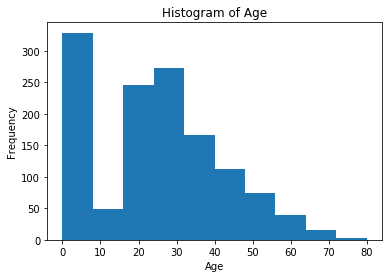

In [2]:
#The full data set (we used two data sets one with over 2400 passengers and crew and a second smaller one with 'just' 1309)
#read in the data
df = pd.read_csv("titanic.csv")
#remove columns that don't add useful information
df = df[df.columns.difference(['body','boat','name','ticket'])]

# replace sex, embarking ports, cabin markers, and home.dest, with unique integer values
# missing values are given a value of 0
df['sex'] = pd.factorize(df.sex,na_sentinel=-1)[0]+1
df['embarked'] = pd.factorize(df.embarked,na_sentinel=-1)[0]+1
df['cabin'] = pd.factorize(df.cabin,na_sentinel=-1)[0]+1
df['home.dest'] = pd.factorize(df['home.dest'],na_sentinel=-1)[0]+1

#replace remaining missing values with 0
df.fillna(0, inplace=True)

"""
The following is a section of code that replaces on uknown age values with ages 
from a normal distrubtion of the known values, however, it did not yield better 
accuracy. However, it did not improve results so it is left commented out, but can
turned on if you wish to see that option.
"""
# features = list(df.columns[:-1])
# feature_avg = df['age'].mean()
# feature_std = df['age'].std()
# feature_nan_count = int(df['age'][np.isnan(df['age'])].size)
# feature_nan_replacement_list = np.random.normal(feature_avg, feature_std, size=feature_nan_count)
# df['age'][np.isnan(df['age'])] = feature_nan_replacement_list

"""
The following code replaces missing values in all of the columns 
with values from a uniform distribution of the known values.
However, it actually decreased the accuracy.
"""
# replace the missing values with guesses from a distribution of the existing values
# for feature in features:
#     feature_avg = df[feature].mean()
#     feature_std = df[feature].std()
# #     df[feature][np.isnan(df[feature])] = feature_na_replacement_list
#     feature_nan_count = int(df[feature][df[feature] == -1].size)
#     #df1[df1['Acct_no'].str[0] == '0']
#     print(feature)
#     feature_nan_replacement_list = np.random.randint(np.floor(feature_avg - feature_std), np.ceil(feature_avg + feature_std), size=feature_nan_count)
# #     print(len(df[feature][df[feature] == -1]),len(feature_nan_replacement_list))
#     df[feature][df[feature] == -1] = feature_nan_replacement_list
    #df[feature][np.isnan(df[feature])] = feature_na_replacement_list
    #df[feature] = df[feature].astype(int)

#create numpy array of the df values
data = df.values

"""
The following code tests that we have imported the data by outputing
the first few rows of the data frame and plotting a histogram of the age
feature
"""    
plt.figure(1)
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Histogram of Age")

df.head()

,Age,Class/Dept,Ticket (Cabin),Joined,Job,Nationality,Sex,Crew,Survived?
0,33.0,1,0,1,1,1,0,0,1
1,45.0,1,0,1,1,2,0,0,1
2,31.0,2,0,1,2,1,0,0,1
3,33.0,1,0,1,3,1,0,0,1
4,45.0,1,0,1,1,1,0,0,1


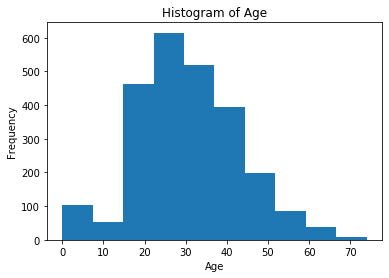

In [3]:
#The full data set (we used two data sets one with over 2400 passengers and crew and a second smaller one with 'just' 1309)
#read in the data for full dataset
df_full = pd.read_excel("complete_titanic2.xlsx", header=1)
df_full = df_full[df_full.columns.difference(['Name'])]
df_full = df_full[['Age', 'Class/Dept', 'Ticket (Cabin)', 'Joined', 'Job', 'Nationality','Sex','Crew','Survived?']]


# generate list of features
features = list(df_full.columns[:-1])


# set ages that are under one year to decimal values
under_one = df_full['Age'][df_full['Age'].str[-1] == 'm']
under_onei = []
for val in under_one:
    under_onei.append(float(val[:-1])/12)
df_full['Age'][df_full['Age'].str[-1] == 'm'] = under_onei

#change Survived? column values to 1 for saved and 0 otherwise
df_full['Survived?'] = pd.Series(np.where(df_full['Survived?'].values == 'SAVED', 1, 0), df_full['Survived?'].index)

# replace sex, embarking ports, cabin markers, and home.dest, with unique integer values
# missing values are given a value of 0
df_full['Sex'] = pd.factorize(df_full.Sex,na_sentinel=-1)[0]
df_full['Crew'] = pd.factorize(df_full.Crew,na_sentinel=-1)[0]
df_full['Joined'] = pd.factorize(df_full.Joined,na_sentinel=-1)[0]+1
df_full['Job'] = pd.factorize(df_full.Job,na_sentinel=-1)[0]+1
df_full['Nationality'] = pd.factorize(df_full.Nationality,na_sentinel=-1)[0]+1
df_full['Ticket (Cabin)'] = pd.factorize(df_full['Ticket (Cabin)'],na_sentinel=-1)[0]+1
df_full['Class/Dept'] = pd.factorize(df_full['Class/Dept'],na_sentinel=-1)[0]+1

#replace remaining missing values with 0
df_full.fillna(0, inplace=True)

#convert age values to numeric
df_full['Age'] = df_full['Age'].astype(float)

#create numpy array of the df_full values
data_full = df_full.values

"""
The following code tests that we have imported the data by outputing
the first few rows of the data frame and plotting a histogram of the age
feature
"""
plt.figure(1)
plt.hist(df_full['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Histogram of Age")

df_full.head()

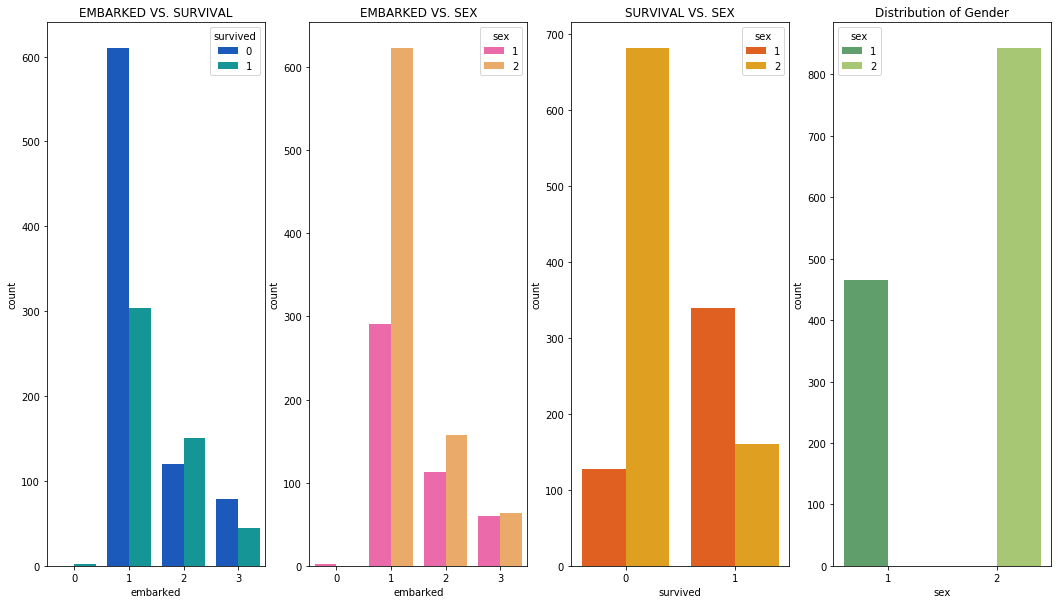

In [4]:
# Generate subplots showing survival rates for key feature variances
plt.figure(figsize=(18,10))

plt.subplot(1,4,1)
plt.title('EMBARKED VS. SURVIVAL')
sns.countplot(x=df['embarked'], hue=df['survived'], palette='winter')


plt.subplot(1,4,2)
plt.title('EMBARKED VS. SEX')
sns.countplot(x=df['embarked'], hue=df['sex'], palette='spring')


plt.subplot(1,4,3)
plt.title('SURVIVAL VS. SEX')
sns.countplot(x=df['survived'], hue=df['sex'], palette= 'autumn')


plt.subplot(1,4,4)
plt.title('Distribution of Gender')
sns.countplot(x=df['sex'], hue=df['sex'], palette= 'summer')

,Age,Class/Dept,Ticket (Cabin),Joined,Job,Nationality,Sex,Crew,Survived?
Age,1.000000,0.085703,-0.033919,0.118692,0.187245,0.051361,0.076819,-0.122047,-0.047112
Class/Dept,0.085703,1.000000,-0.219461,0.219976,-0.036808,-0.072077,0.159126,-0.284232,-0.069521
Ticket (Cabin),-0.033919,-0.219461,1.000000,-0.229083,0.220392,0.154205,0.091119,0.712967,-0.064933
Joined,0.118692,0.219976,-0.229083,1.000000,-0.025708,0.004104,0.104862,-0.285166,-0.101872
Job,0.187245,-0.036808,0.220392,-0.025708,1.000000,0.055542,0.368222,0.012723,-0.193164
Nationality,0.051361,-0.072077,0.154205,0.004104,0.055542,1.000000,-0.055565,0.191476,0.050344
Sex,0.076819,0.159126,0.091119,0.104862,0.368222,-0.055565,1.000000,-0.414994,-0.474403
Crew,-0.122047,-0.284232,0.712967,-0.285166,0.012723,0.191476,-0.414994,1.000000,0.199827
Survived?,-0.047112,-0.069521,-0.064933,-0.101872,-0.193164,0.050344,-0.474403,0.199827,1.000000


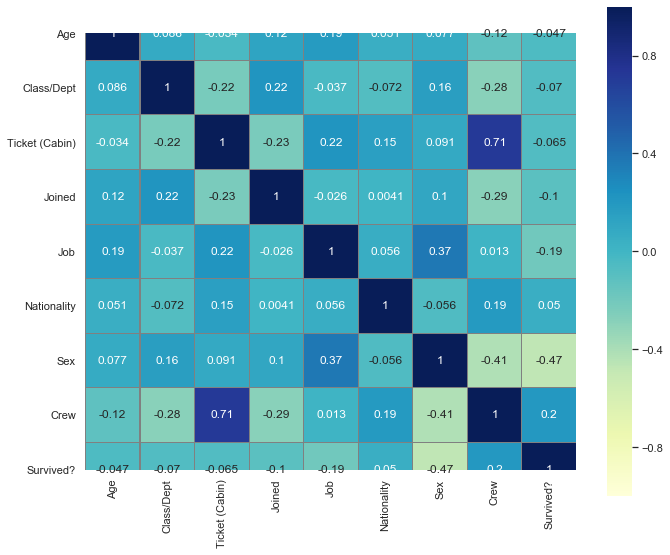

In [5]:
# The following code
# plots a correlation table
# Draws a heatmap with the mask and correct aspect ratio (all but the top and bottom squares because sns
# needs to do an update)
sns.set(style="dark")
corr = df_full.corr()
display(corr)
f, ax = plt.subplots(figsize=(11, 9))
ax.set_aspect('equal')
ax = sns.heatmap(corr, cmap='YlGnBu', vmax=1, vmin=-1, center=0, square=True, linewidths=.05, linecolor='grey',
                 annot = True)
ax.set_aspect('equal')
plt.show()

In [6]:
# Random forest classifer (Using the full data set)
# set feature and target names
features = list(df_full.columns)[:-1]
targets = list(df_full.columns)[-1]
print(features)

# split the data into X_train, X_test, Y_train, Y_test
X = data_full[:,:-1]
y = data_full[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.25, random_state=42)

# create the classifer
clf = RandomForestClassifier()

# fit the trees
clf = clf.fit(X_train, Y_train)

#get important features
importances = clf.feature_importances_

#get the index values of the important features in order of importance
indices = np.argsort(importances)[::-1]

print("Accuracy score for test data of Random Forest classifier =", clf.score(X_test,Y_test))

#get one of the trees from the forest to visualize
estimator = clf.estimators_[-1]

"""
The following code generates a print of the decision tree we selected above, however, you need to download a package
and adjust your path to use graphviz so we commented it out so you can see the rest of the results
"""
# dot_data = tree.export_graphviz(estimator, out_file=None, feature_names=features, class_names=targets, 
#                                 filled=True, rounded=True, special_characters=True) 
# graph = graphviz.Source(dot_data) 
# graph.render("Survivors_of_Titanic_full_data") 
# graph

['Age', 'Class/Dept', 'Ticket (Cabin)', 'Joined', 'Job', 'Nationality', 'Sex', 'Crew']
Accuracy score for test data of Random Forest classifier = 0.8255250403877221


/Users/zhishanli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


'\nThe following code generates a print of the decision tree we selected above, however, you need to download a package\nand adjust your path to use graphviz so we commented it out so you can see the rest of the results\n'

Feature ranking:
1. feature Age (0.237263)
2. feature Job (0.235730)
3. feature Ticket (Cabin) (0.197744)
4. feature Class/Dept (0.103095)
5. feature Sex (0.095963)
6. feature Nationality (0.082770)
7. feature Joined (0.034886)
8. feature Crew (0.012549)


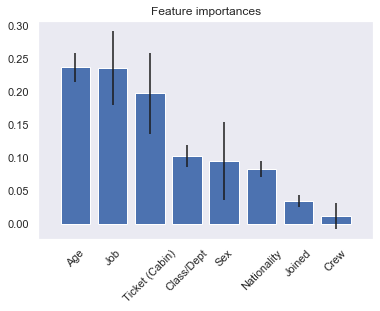

In [7]:
# Full Data set
# Print the feature ranking
print("Feature ranking:")
ranked_features = []
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))
    ranked_features.append(features[indices[f]])
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), ranked_features, rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

In [8]:
# Random forest classifer (Using the 1309 data set)
# set feature and target names
features = list(df.columns)[:-1]
targets = list(df.columns)[-1]
print(features)

# split the data into X_train, X_test, Y_train, Y_test
X = data[:,:-1]
y = data[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.25, random_state=42)

# create the classifer
clf = RandomForestClassifier()

# fit the trees
clf = clf.fit(X_train, Y_train)

#get important features
importances = clf.feature_importances_

#get the index values of the important features in order of importance
indices = np.argsort(importances)[::-1]

#get one of the trees from the forest to visualize
estimator = clf.estimators_[-1]

print("Accuracy score for test data of Random Forest classifier =", clf.score(X_test,Y_test))

"""
The following code generates a print of the decision tree we selected above, however, you need to download a package
and adjust your path to use graphviz so we commented it out so you can see the rest of the results
"""
# dot_data = tree.export_graphviz(estimator, out_file=None, 
#                                 feature_names=features, class_names=targets, 
#                                 filled=True, rounded=True, special_characters=True) 
# graph = graphviz.Source(dot_data) 
# graph.render("Survivors_of_Titanic_1309_data") 
# graph

['age', 'cabin', 'embarked', 'fare', 'home.dest', 'parch', 'pclass', 'sex', 'sibsp']
Accuracy score for test data of Random Forest classifier = 0.7804878048780488


/Users/zhishanli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


'\nThe following code generates a print of the decision tree we selected above, however, you need to download a package\nand adjust your path to use graphviz so we commented it out so you can see the rest of the results\n'

Feature ranking:
1. feature sex (0.251090)
2. feature fare (0.215185)
3. feature age (0.167390)
4. feature home.dest (0.115494)
5. feature cabin (0.084844)
6. feature pclass (0.056428)
7. feature parch (0.037940)
8. feature sibsp (0.037598)
9. feature embarked (0.034031)


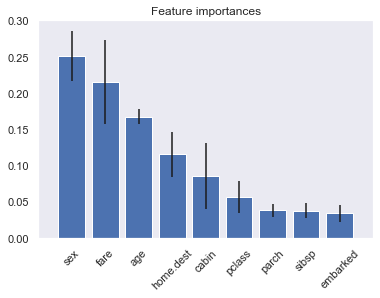

In [9]:
# Using the 1309 data set
# Print the feature ranking
print("Feature ranking:")
ranked_features = []
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))
    ranked_features.append(features[indices[f]])
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), ranked_features, rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

In [10]:
# Full data only
# please note this cell takes a long time to run
#Random forest again removing 1-5 features and varying and keep the best score
complete_features = list(df_full.columns)[:-1]
best_score = [0 for x in range(7)]
best_features = [[] for x in range(7)]
best_exclude = [[] for x in range(7)]

# create array of index values for the full feature set
number = np.arange(8)

# create array of test size values
test_s = [.10,.15,.20,.25,.30,.35,.40]

# loop over and test random forest classifier using everything combination of 3 to 7 features of the 8 total features
for j in range(len(test_s)):
    for i in range(1,6):
        # generate the lists of index values for any combination of i features to exclude
        results = itertools.combinations(number,i)
        results = list(results)
        for index_vals in results:
            #genreate a list of the column names to remove
            exclude = list(operator.itemgetter(*index_vals)(complete_features))

            #generate the data
            df2 = df_full[df_full.columns.difference(exclude)]
            data2 = df2.values

            features = list(df2.columns)[:-1]
            targets = list(df2.columns)[-1]

            X = data2[:,:-1]
            y = data2[:,-1]
            X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_s[j], random_state=42)
            scores = []
            #find the best average score
            for i in range(3):

                # test
                clf = RandomForestClassifier(n_estimators=len(features))
                clf = clf.fit(X_train, Y_train)
                scores.append(clf.score(X_test,Y_test))

            score = np.mean(scores)
            if score > best_score[j]:
                best_score[j] = score
                best_exclude[j] = exclude
                best_features[j] = features

In [11]:
for i,val in enumerate(test_s):
    print("best_score for training size", val, "is", best_score[i])
    print("The features that were used to achieve this score are", best_features[i])

best_score for training size 0.1 is 0.8508064516129031
The features that were used to achieve this score are ['Class/Dept', 'Crew', 'Nationality', 'Sex']
best_score for training size 0.15 is 0.8396057347670252
The features that were used to achieve this score are ['Class/Dept', 'Nationality', 'Sex']
best_score for training size 0.2 is 0.853494623655914
The features that were used to achieve this score are ['Class/Dept', 'Crew', 'Nationality', 'Sex']
best_score for training size 0.25 is 0.8562197092084006
The features that were used to achieve this score are ['Class/Dept', 'Crew', 'Nationality', 'Sex']
best_score for training size 0.3 is 0.8407357559443698
The features that were used to achieve this score are ['Class/Dept', 'Crew', 'Nationality', 'Sex']
best_score for training size 0.35 is 0.8508266051518647
The features that were used to achieve this score are ['Class/Dept', 'Crew', 'Nationality', 'Sex']
best_score for training size 0.4 is 0.8469559367642111
The features that were used

In [12]:
# Random forest one more time on the full data set with the best set of features
# set feature and target names
features = best_features
targets = list(df2.columns)[-1]
print(features)

#use the best features for training size of .25
df2 = df_full[df_full.columns.difference(best_exclude[3])]
data2 = df2.values

# split the data into X_train, X_test, Y_train, Y_test
X = data2[:,:-1]
y = data2[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.25, random_state=42)

# create the classifer
clf = RandomForestClassifier()

# fit the trees
clf = clf.fit(X_train, Y_train)

#get important features
importances = clf.feature_importances_

#get the index values of the important features in order of importance
indices = np.argsort(importances)[::-1]

#get one of the trees from the forest to visualize
estimator = clf.estimators_[-1]
print("Accuracy score for test data of Random Forest classifier =", clf.score(X_test,Y_test))

"""
The following code generates a print of the decision tree we selected above, however, you need to download a package
and adjust your path to use graphviz so we commented it out so you can see the rest of the results
"""
# dot_data = tree.export_graphviz(estimator, out_file=None, 
#                                 feature_names=features, class_names=targets, 
#                                 filled=True, rounded=True, special_characters=True) 
# graph = graphviz.Source(dot_data) 
# graph.render("Survivors_of_Titanic_full_data_best_features") 
# graph

[['Class/Dept', 'Crew', 'Nationality', 'Sex'], ['Class/Dept', 'Nationality', 'Sex'], ['Class/Dept', 'Crew', 'Nationality', 'Sex'], ['Class/Dept', 'Crew', 'Nationality', 'Sex'], ['Class/Dept', 'Crew', 'Nationality', 'Sex'], ['Class/Dept', 'Crew', 'Nationality', 'Sex'], ['Class/Dept', 'Joined', 'Sex']]
Accuracy score for test data of Random Forest classifier = 0.8497576736672051


/Users/zhishanli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


'\nThe following code generates a print of the decision tree we selected above, however, you need to download a package\nand adjust your path to use graphviz so we commented it out so you can see the rest of the results\n'

Feature ranking:
1. feature ['Class/Dept', 'Crew', 'Nationality', 'Sex'] (0.472131)
2. feature ['Class/Dept', 'Crew', 'Nationality', 'Sex'] (0.253615)
3. feature ['Class/Dept', 'Crew', 'Nationality', 'Sex'] (0.217013)
4. feature ['Class/Dept', 'Nationality', 'Sex'] (0.057241)


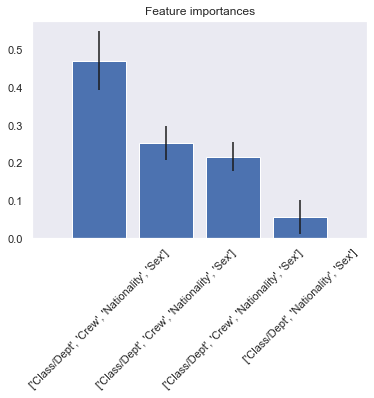

In [13]:
# full dataset with the best features
# Print the feature ranking
print("Feature ranking:")
ranked_features = []
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))
    ranked_features.append(features[indices[f]])
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), ranked_features, rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

In [14]:
# full data only
#Classification using support vector machines
# set feature and target names
features = list(df_full.columns)[:-1]
targets = list(df_full.columns)[-1]

X = data_full[:,:-1]
y = data_full[:,-1]

#to use the best features for RF uncomment the following four lines
# X = data2[:,:-1]
# y = data2[:,-1]
# features = best_features
# targets = list(df2.columns)[-1]
print(features)

# split the data into X_train, X_test, Y_train, Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.25, random_state=42)

# create the classifer
clf = svm.SVC(gamma='scale')

# fit the trees
clf = clf.fit(X_train, Y_train)

print("Accuracy score for test data of Random Forest classifier =", clf.score(X_test,Y_test))

['Age', 'Class/Dept', 'Ticket (Cabin)', 'Joined', 'Job', 'Nationality', 'Sex', 'Crew']
Accuracy score for test data of Random Forest classifier = 0.7625201938610663


In [15]:
# full data only
# SGDClassifier
# Gradient Descent
features = list(df_full.columns)[:-1]
targets = list(df_full.columns)[-1]

X = data_full[:,:-1]
y = data_full[:,-1]

#to use the best features for RF uncomment the following four lines
# X = data2[:,:-1]
# y = data2[:,-1]
# features = best_features
# targets = list(df2.columns)[-1]
print(features)

# split the data into X_train, X_test, Y_train, Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.25, random_state=42)

# create the classifer
clf = SGDClassifier()

# fit the SGD
clf = clf.fit(X_train, Y_train)

print("Accuracy score for test data of Random Forest classifier =", clf.score(X_test,Y_test))

['Age', 'Class/Dept', 'Ticket (Cabin)', 'Joined', 'Job', 'Nationality', 'Sex', 'Crew']
Accuracy score for test data of Random Forest classifier = 0.6478190630048465


In [5]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from keras import backend as K

# Import dataset
data = pd.read_excel("complete_titanic2.xlsx", header=1)
data = data[['Age', 'Class/Dept', 'Joined', 'Sex', 'Crew', 'Nationality', 'Job', 'Survived?']]

# String value masking to numbers
class_dict = dict(zip(data['Class/Dept'].unique(), range(len(data['Class/Dept'].unique()))))
joined_dict = dict(zip(data['Joined'].unique(), range(len(data['Joined'].unique()))))
nationality_dict = dict(zip(data['Nationality'].unique(), range(len(data['Nationality'].unique()))))
job_dict = dict(zip(data['Job'].unique(), range(len(data['Job'].unique()))))
surv_dict = dict(zip(data['Survived?'].unique(), range(len(data['Survived?'].unique()))))

# Patch nans and extraneous data
# Cut into input/output
under_one = data['Age'][data['Age'].str[-1] == 'm']
under_onei = []
for val in under_one:
    under_onei.append(float(val[:-1])/12)
data['Age'][data['Age'].str[-1] == 'm'] = under_onei
X = data[['Age', 'Class/Dept', 'Joined', 'Sex', 'Crew', 'Nationality', 'Job']]
y = data[['Survived?']]
X = X.replace({'Class/Dept' : class_dict, 'Joined' : joined_dict, 'Nationality' : nationality_dict, 'Job' : job_dict})
y['Survived?'] = pd.Series(np.where(y['Survived?'].values == 'SAVED', 1, 0), y['Survived?'].index)
X.fillna(0, inplace=True)

batch_size = 16
epochs = 2

# Split and normalize
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.25)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train['Age'] /= X['Age'].max()
X_train['Class/Dept'] /= X['Class/Dept'].max()
X_train['Joined'] /= X['Joined'].max()
X_train['Nationality'] /= X['Nationality'].max()
X_train['Sex'] /= X['Sex'].max()
X_train['Crew'] /= X['Crew'].max()
X_train['Job'] /= X['Job'].max()

X_test['Age'] /= X['Age'].max()
X_test['Class/Dept'] /= X['Class/Dept'].max()
X_test['Joined'] /= X['Joined'].max()
X_test['Nationality'] /= X['Nationality'].max()
X_test['Sex'] /= X['Sex'].max()
X_test['Crew'] /= X['Crew'].max()
X_test['Job'] /= X['Job'].max()

# Categorize Ouput opitons
Y_train = keras.utils.to_categorical(Y_train, num_classes=2)
Y_test = keras.utils.to_categorical(Y_test, num_classes=2)

model = Sequential()
# Rectified Linear Unit
model.add(Dense(activation="relu", input_dim=7, units=3, kernel_initializer="uniform"))
# Linear
model.add(Dense(activation="linear", units=2, kernel_initializer="uniform"))
# Sigmoid
model.add(Dense(activation="sigmoid", units=2, kernel_initializer="uniform"))

# Compile
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

# Fit training data
model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# Evaluate with test data
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


/Users/zhishanli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Train on 1857 samples, validate on 619 samples
Epoch 1/2
1857/1857 [==============================] - 0s 155us/step - loss: 0.6764 - accuracy: 0.7076 - val_loss: 0.6577 - val_accuracy: 0.7205
Epoch 2/2
1857/1857 [==============================] - 0s 76us/step - loss: 0.6409 - accuracy: 0.7097 - val_loss: 0.6183 - val_accuracy: 0.7205
Test loss: 0.6182679321153484
Test accuracy: 0.7205169796943665
